In [5]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

In [3]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [4]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

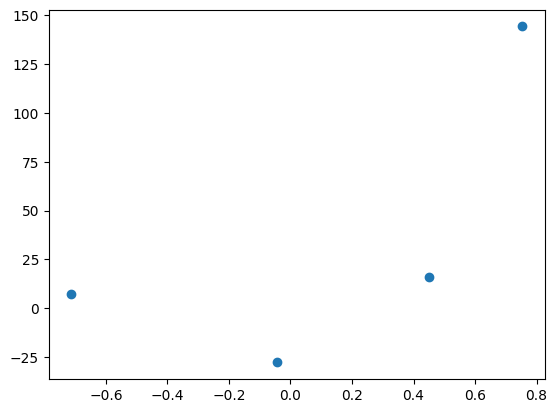

In [6]:
plt.scatter(X,y)

In [37]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
lr.coef_

array([78.35063668])

In [40]:
lr.intercept_

np.float64(26.15963284313262)

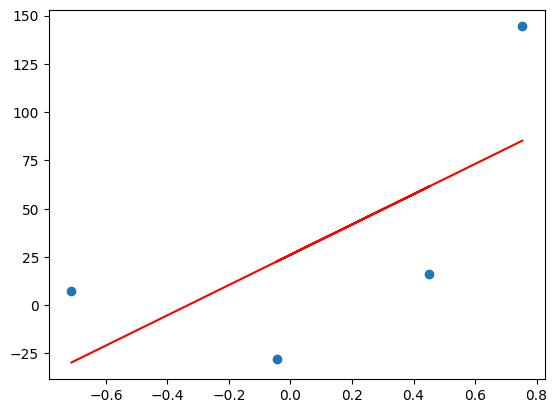

In [13]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [17]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((lr.coef_ * X) + 10).reshape(4)

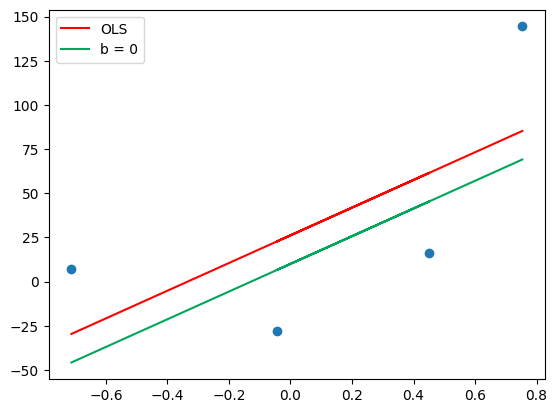

In [18]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [21]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope 

np.float64(-209.27763408209216)

In [22]:
lnr = 0.1
step_size = lnr * loss_slope 
step_size

np.float64(-20.927763408209216)

In [23]:
b = b - step_size
b

np.float64(20.927763408209216)

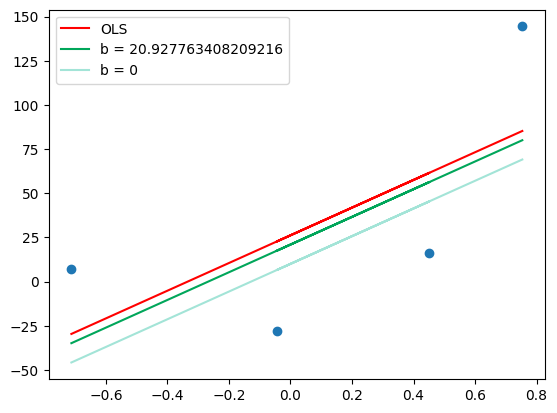

In [24]:

y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

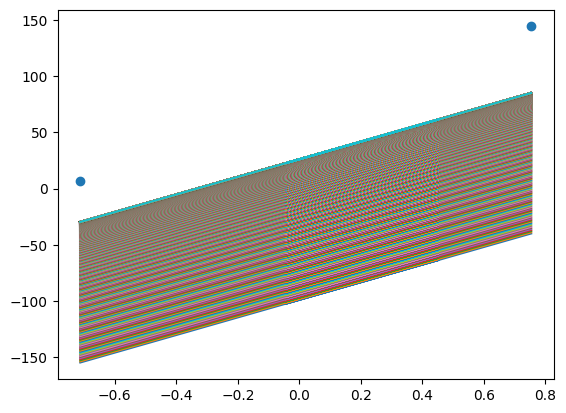

In [42]:
# we can do this using loop
b = -100
m = 78.35
lnr = 0.001
epochs = 1000
plt.plot(X,lr.predict(X),color='red',label='OLS')
for i in range(epochs):
    loss_slope = -2 * np.sum(y-m*X.ravel()-b)
    step_size = lnr * loss_slope
    b = b - step_size

    y_predd = m*X+b

    plt.plot(X,y_predd)

plt.scatter(X,y)